In [2]:
#import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#If you remove this you'll see only 10 rows truncated with '...'
pd.options.display.max_rows = 4000

In [4]:
#Reading the CSV file
#Make sure the CSV file is in the same file as the python kernel 
#Alternatively replace the CSV path in below code

loans = pd.read_csv("loan.csv",encoding='ISO-8859-1',low_memory=False)

#Converting the interest rate from type string to float
loans['int_rate'] = loans['int_rate'].str.split('%').str[0].astype(float)

In [5]:
#We see that there are lot of null values.

loans.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#Getting concise summary of the dataframe
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(13), object(23)
memory usage: 33.6+ MB


In [7]:

#Getting the percentage of null values in each column
#Drop columns with lot of null values as it won't be helpful in our analysis

null_values = round(100*(loans.isnull().sum()/len(loans.id)), 2)
null_values.loc[null_values > 0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

<p> From the above executed statement we see that we have as many as 68 columns with more than 0% null values</p>

<p>We will therefore remove not all, but some of the columns with null values</p>

In [8]:
#Removing unnecessary column for analysis
null_values_cols = list(null_values[null_values >= 30].index)
loans = loans.drop(null_values_cols,axis=1)
print(loans.shape)

(39717, 53)


<p>As the next step we proposed removing all the columns having more than 30% null values</p>

<p>This led to 58 columns being dropped. The number of usable columns therefore came down to 53.</p>

In [9]:
missing_remaining = round(100*(loans.isnull().sum()/len(loans.id)), 2)
missing_remaining[missing_remaining != 0]
#We have narrowed the columns in which data is missing to 10.

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

<p>Employee title and employee length may be crucial to our analysis. However, these columns include 6.19% <b>and 2.71% null values respectively which might distort our analysis.</b> So we propose to drop the rows where either employee title is null or employee length is null.</p>

In [10]:
loans = loans[~loans.emp_title.isnull()]
loans = loans[~loans.emp_length.isnull()]
loans.shape

(37202, 53)

In [11]:
loans = loans.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc,pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1, errors='ignore')
loans.shape

(37202, 34)

In [12]:
missing_remaining1 = round(100*(loans.isnull().sum()/len(loans.id)), 2)
missing_remaining1[missing_remaining1 != 0]

title                         0.02
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

<p>For the above columns let us analyze the type of variable</p>

In [13]:
#Printing the number of the unique values along with count for each of the above column

print("Collections_12_mths_ex_med:",loans.collections_12_mths_ex_med.unique())
print(loans.collections_12_mths_ex_med.value_counts().to_string(),"\n")

print("Chargeoff_within_12_mths:",loans.chargeoff_within_12_mths.unique())
print(loans.chargeoff_within_12_mths.value_counts().to_string(),"\n")

print("Pub_rec_bankruptcies:",loans.pub_rec_bankruptcies.unique())
print(loans.pub_rec_bankruptcies.value_counts().to_string(),"\n")

print("Tax_liens:",loans.tax_liens.unique())
print(loans.tax_liens.value_counts().to_string(),"\n")

Collections_12_mths_ex_med: [ 0. nan]
0.0    37155 

Chargeoff_within_12_mths: [ 0. nan]
0.0    37155 

Pub_rec_bankruptcies: [ 0.  1.  2. nan]
0.0    35039
1.0     1502
2.0        7 

Tax_liens: [ 0. nan]
0.0    37170 



<p>These are all categorical variables.</p>

<p>Now since the values in column Collections_12_mths_ex_med, Chargeoff_within_12_mths, Tax_liens is 0 or NaN. Hence we propose to drop all such columns without impacting our analysis.</p>

<p>For variable Pub_rec_bankruptcies we propose to replace the null values by the central tendency, that is, Mode. Because in  this case, Mode is the clear representation of the variable. Hence we replace the null values by 0.</p>

In [14]:
loans = loans.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'], axis=1)
loans.pub_rec_bankruptcies.fillna(loans.pub_rec_bankruptcies.mode()[0], inplace=True)
print("Pub_rec_bankruptcies:",loans.pub_rec_bankruptcies.unique())
print(loans.pub_rec_bankruptcies.value_counts().to_string(),"\n")
loans.shape

Pub_rec_bankruptcies: [0. 1. 2.]
0.0    35693
1.0     1502
2.0        7 



(37202, 31)

In [15]:
loans['term']=loans['term'].astype(str).str.strip('').str[0:3]
loans['term'].head()
loans['term']=loans['term'].astype(int)
loans['issued']=loans['issue_d'].str.split('-').str[1]
loans['issued'].astype(int)

1        11
3        11
4        11
5        11
6        11
         ..
39710     7
39711     7
39712     7
39713     7
39716     7
Name: issued, Length: 37202, dtype: int32

In [16]:
loans = loans.loc[loans['loan_status'] != "Current"]
loans.shape

(36136, 32)

In [17]:
#Finding the correlation between the different columns of the dataset
#Using the corr function in pandas
loans.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,policy_code,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
id,1.000000,0.993500,0.123246,0.134316,0.236651,0.179689,0.057957,0.078341,0.007793,0.090075,0.018296,-0.020243,NaN,NaN,NaN,-0.000923
member_id,0.993500,1.000000,0.123398,0.133711,0.246925,0.198558,0.054959,0.073397,0.008984,0.091414,0.015829,-0.020067,NaN,NaN,NaN,-0.000105
loan_amnt,0.123246,0.123398,1.000000,0.981602,0.936210,0.348215,0.298697,0.931293,0.255517,0.063912,0.174405,-0.046677,NaN,NaN,NaN,-0.029968
funded_amnt,0.134316,0.133711,0.981602,1.000000,0.954652,0.326833,0.303065,0.957230,0.251024,0.063947,0.172857,-0.047395,NaN,NaN,NaN,-0.031234
funded_amnt_inv,0.236651,0.246925,0.936210,0.954652,1.000000,0.346952,0.295665,0.902552,0.238454,0.072976,0.159972,-0.049260,NaN,NaN,NaN,-0.032388
term,0.179689,0.198558,0.348215,0.326833,0.346952,1.000000,0.441600,0.089815,0.044973,0.077074,0.044185,0.012515,NaN,NaN,NaN,0.020799
int_rate,0.057957,0.054959,0.298697,0.303065,0.295665,0.441600,1.000000,0.274524,0.045486,0.114364,0.007798,0.099717,NaN,NaN,NaN,0.084701
installment,0.078341,0.073397,0.931293,0.957230,0.902552,0.089815,0.274524,1.000000,0.252474,0.054221,0.170913,-0.042851,NaN,NaN,NaN,-0.028655
annual_inc,0.007793,0.008984,0.255517,0.251024,0.238454,0.044973,0.045486,0.252474,1.000000,-0.120770,0.153472,-0.013777,NaN,NaN,NaN,-0.010699
dti,0.090075,0.091414,0.063912,0.063947,0.072976,0.077074,0.114364,0.054221,-0.120770,1.000000,0.289386,-0.005413,NaN,NaN,NaN,0.007914


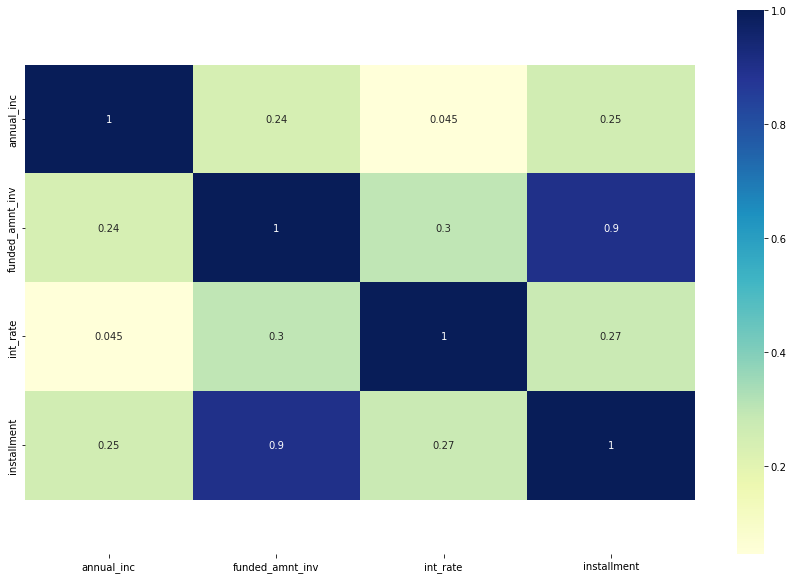

In [18]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(loans[['annual_inc','funded_amnt_inv','int_rate','installment']].corr(), cmap="YlGnBu", annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [19]:
loans['int_rate'].describe()

count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

(36136, 32)

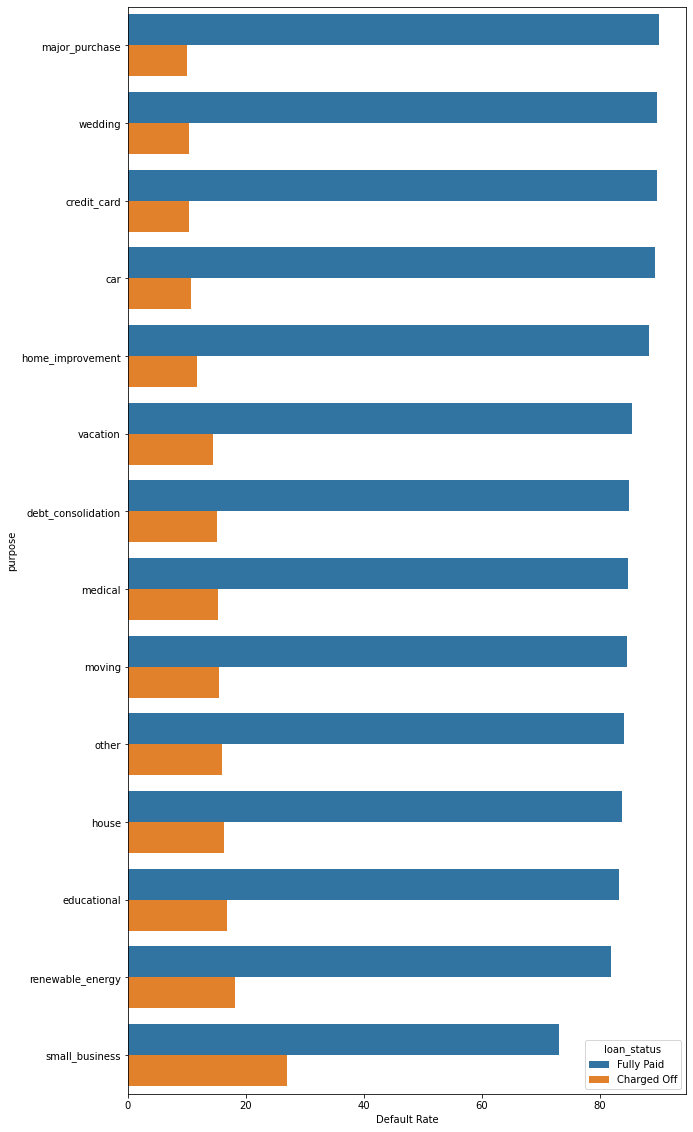

In [20]:
#We are plotting the purpose against the default rate
freq_rnkcnt_rate=(loans[loans['loan_status']!="Current"].groupby(['purpose','loan_status']).loan_status.count()/loans[loans['loan_status']!="Current"].groupby(['purpose']).loan_status.count())*100
freq_rnkcnt_rate=pd.DataFrame(freq_rnkcnt_rate)
freq_rnkcnt_rate.dropna(inplace=True,axis=0)

freq_rnkcnt_rate.rename(columns={"loan_status":"Default Rate"},inplace=True)
freq_rnkcnt_rate=pd.DataFrame(freq_rnkcnt_rate.to_records())
freq_rnkcnt_rate.sort_values(by="Default Rate",inplace=True,ascending=False)
plt.figure(figsize=(10,20))
sns.barplot(x="Default Rate",y="purpose",data=freq_rnkcnt_rate,hue="loan_status")
loans.shape

In [22]:
#In the below graph let us plot purpose against default rate
freq_rnkcnt=loans[loans['loan_status']!="Current"].groupby(['purpose','loan_status']).loan_status.count()
freq_rnkcnt=pd.DataFrame(freq_rnkcnt)
freq_rnkcnt.dropna(inplace=True,axis=0)

freq_rnkcnt.rename(columns={"loan_status":"Default Rate"},inplace=True)
freq_rnkcnt=pd.DataFrame(freq_rnkcnt.to_records())
freq_rnkcnt.sort_values(by="Default Rate",inplace=True,ascending=False)

<AxesSubplot:xlabel='Default Rate', ylabel='purpose'>

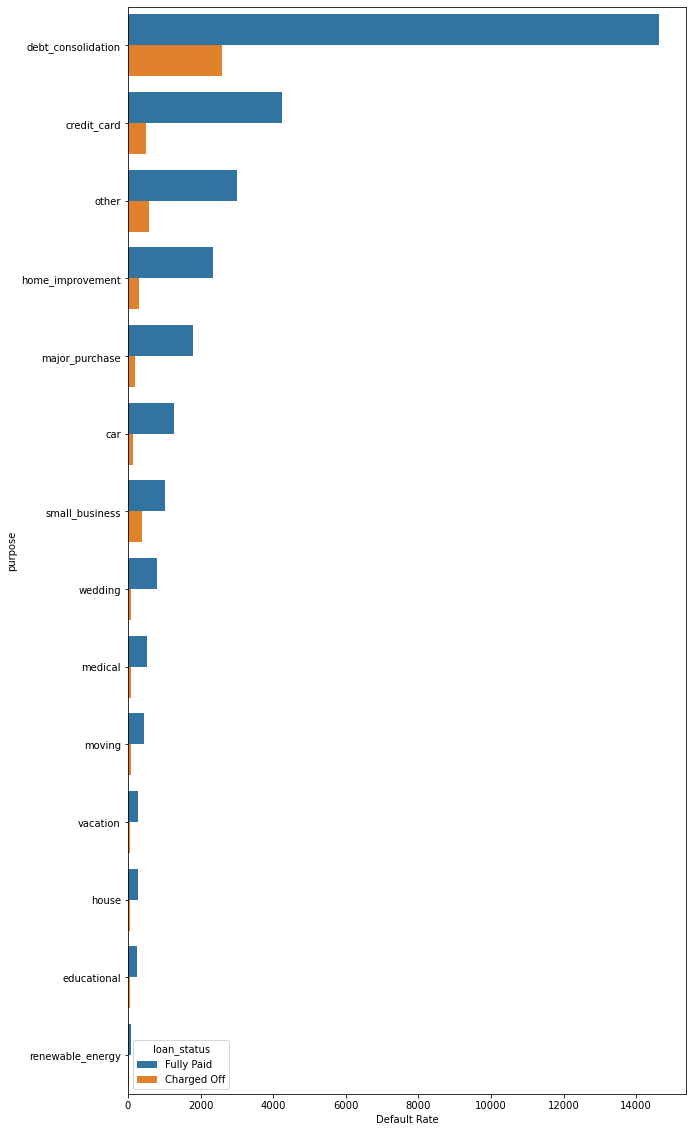

In [23]:
plt.figure(figsize=(10,20))
sns.barplot(x="Default Rate",y="purpose",data=freq_rnkcnt,hue="loan_status")

In [37]:
#Let us now understand the correlation between the loan status and term here 
freq_rnkcnt_term=loans[loans['loan_status']=="Charged Off"].groupby(['term','loan_status']).loan_status.count()

freq_rnkcnt_term=pd.DataFrame(freq_rnkcnt_term)
freq_rnkcnt_term.rename(columns={"loan_status":"count"},inplace=True)
freq_rnkcnt_term

,,count
term,loan_status,
36,Charged Off,2526
60,Charged Off,1856


In [ ]:
# Over 60% of the defaulters seems to be from higher tenure of 60 months. Could the Club be better off lending off for shorter tenures?  

In [38]:
freq_rnkcnt_lc=(loans[(loans['loan_status']!="Current")].groupby(['grade','loan_status']).grade.count()/loans[(loans['loan_status']!="Current")].groupby(['grade']).grade.count())*100
freq_rnkcnt_lc=pd.DataFrame(freq_rnkcnt_lc)
freq_rnkcnt_lc.dropna(inplace=True,axis=0)
freq_rnkcnt_lc.rename(columns={"grade":"Percentage"},inplace=True)
freq_rnkcnt_lc=pd.DataFrame(freq_rnkcnt_lc.to_records())
freq_rnkcnt_lc.sort_values(by="grade",inplace=True,ascending=False)
freq_rnkcnt_lc

,grade,loan_status,Percentage
12,G,Charged Off,41.317365
13,G,Fully Paid,58.682635
10,F,Charged Off,34.880000
11,F,Fully Paid,65.120000
8,E,Charged Off,28.571429
9,E,Fully Paid,71.428571
6,D,Charged Off,22.525773
7,D,Fully Paid,77.474227
4,C,Charged Off,17.726747
5,C,Fully Paid,82.273253


<AxesSubplot:xlabel='grade', ylabel='Percentage'>

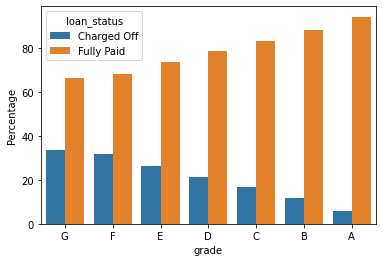

In [28]:
sns.barplot(x="grade",y="Percentage",data=freq_rnkcnt_lc,hue="loan_status")

In [ ]:
# We also ee that the proportion of defaulters to those who have fully paid off their loans increases almost linearly as the profile moves from Grade A to Grage F. This indicates the need to restrict extending the loans to Grades A to C or A to D max.  

,home_ownership,loan_status,Percentage
0,MORTGAGE,Charged Off,13.277774
4,OWN,Charged Off,14.141414
6,RENT,Charged Off,15.023421
2,OTHER,Charged Off,18.750000
3,OTHER,Fully Paid,81.250000
7,RENT,Fully Paid,84.976579
5,OWN,Fully Paid,85.858586
1,MORTGAGE,Fully Paid,86.722226


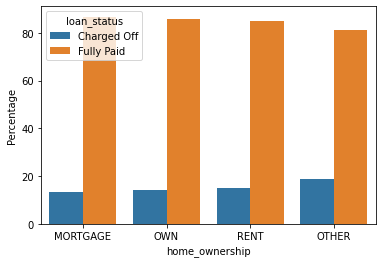

In [20]:
#Plotting the correlation between the home ownership and loan status
loans1 = loans.loc[loans['home_ownership']!="NONE"]
freq_rnkcnt_ownership=loans1[(loans1['loan_status']!="Current")].groupby(['home_ownership','loan_status']).loan_status.count()*100/loans1[(loans1['loan_status']!="Current")].groupby(['home_ownership']).loan_status.count()
freq_rnkcnt_ownership=pd.DataFrame(freq_rnkcnt_ownership)
freq_rnkcnt_ownership.rename(columns={"loan_status":"Percentage"},inplace=True)
freq_rnkcnt_ownership=pd.DataFrame(freq_rnkcnt_ownership.to_records())
freq_rnkcnt_ownership.sort_values(by="Percentage",inplace=True)
sns.barplot(x="home_ownership",y="Percentage",data=freq_rnkcnt_ownership,hue="loan_status")
# No clear correlation between home ownership and the Loan Status as there is no significant difference
freq_rnkcnt_ownership

In [ ]:
# Again we see that the percentage of defaulters is higher in the "Others" category of home ownership. Suggesting that the Club would be better off extending its loans to those who have Mortgaged, Owned or Rented their homes (in that order)

<AxesSubplot:xlabel='Percentage', ylabel='emp_length'>

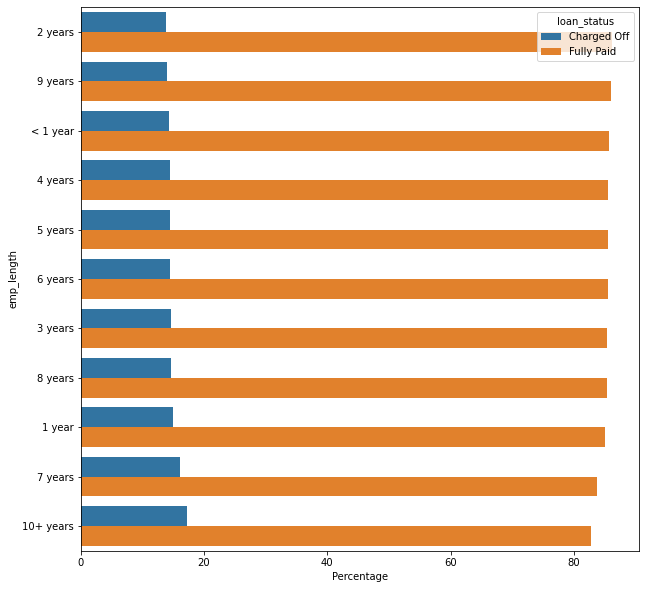

In [39]:
#Studying the effect of number of years of experience a person has on loan status
freq_rnkcnt_emp=(loans[(loans['loan_status']!="Current")].groupby(['emp_length','loan_status']).grade.count()/loans[(loans['loan_status']!="Current")].groupby(['emp_length']).grade.count())*100
freq_rnkcnt_emp=pd.DataFrame(freq_rnkcnt_emp)
freq_rnkcnt_emp.dropna(inplace=True,axis=0)
freq_rnkcnt_emp.rename(columns={"grade":"Percentage"},inplace=True)
freq_rnkcnt_emp=pd.DataFrame(freq_rnkcnt_emp.to_records())
freq_rnkcnt_emp.sort_values(by="Percentage",inplace=True)
freq_rnkcnt_emp
plt.figure(figsize=(10,10))
sns.barplot(x="Percentage",y="emp_length",data=freq_rnkcnt_emp,hue="loan_status")


In [ ]:
# Caution ! The proportion of defaulters seems to be highest among those who have been employed for 10 years or more. While it is obviously attractive to market loans to those who have been employed for long, it would be worthwhile to investigate why those with the highest number of years at their jobs are defaulting the most.      

<AxesSubplot:ylabel='annual_inc'>

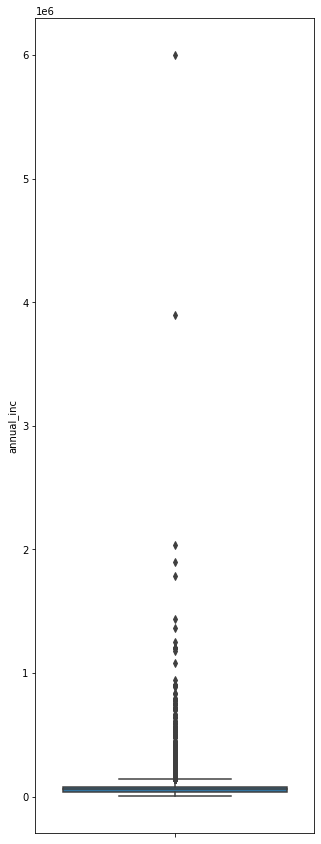

In [32]:
plt.figure(figsize=(5,15))
sns.boxplot(y="annual_inc",data=loans)

<AxesSubplot:ylabel='annual_inc'>

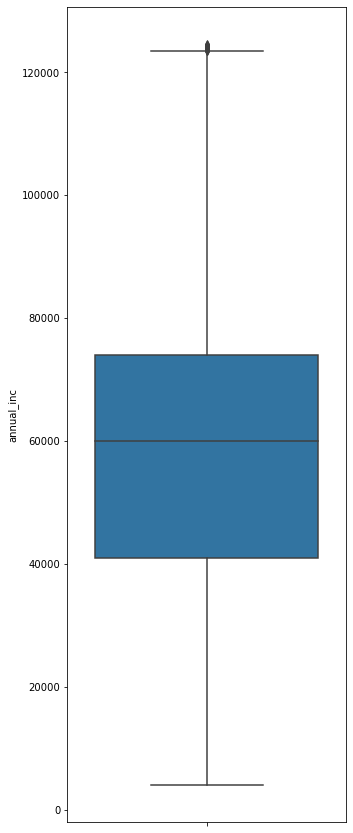

In [22]:
median = loans['annual_inc'].median()
std = loans['annual_inc'].std()
outliers = (loans['annual_inc'] - median).abs() > std
loans[outliers] = np.nan
loans['annual_inc'].fillna(median, inplace=True)
plt.figure(figsize=(5,15))
sns.boxplot(y="annual_inc",data=loans)

In [33]:
loans['annual_inc'].describe()

count    3.613600e+04
mean     6.903275e+04
std      6.462191e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
# We do see that the median salary of loan getters stands at 60,000. 75% are under 82,000.There are also outliers. 
# At the next step we decided to Classift the Income (a float) to three categories, High, Mid Range and Low, for ease of analysis. High = 90,000 and above, Mid Level = Above 40,000 but under 90,000 and Low: Upto 40,000.

In [34]:
loans=loans[pd.notnull(loans['annual_inc'])]
loans['annual_inc_classification']=pd.cut(loans['annual_inc'],[0,40000,80000,90000],labels=['Low','Mid Range','High'])
loans=loans[pd.notnull(loans['annual_inc_classification'])]

<AxesSubplot:xlabel='annual_inc_classification', ylabel='Percentage'>

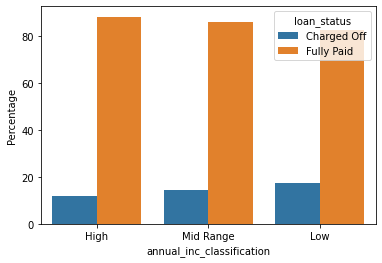

In [30]:
freq_rnkcnt_annual=(loans[(loans['loan_status']!="Current")].groupby(['annual_inc_classification','loan_status']).loan_status.count()/loans[(loans['loan_status']!="Current")].groupby(['annual_inc_classification']).loan_status.count())*100
freq_rnkcnt_annual=pd.DataFrame(freq_rnkcnt_annual)
freq_rnkcnt_annual.rename(columns={"loan_status":"Percentage"},inplace=True)
freq_rnkcnt_annual=pd.DataFrame(freq_rnkcnt_annual.to_records())
freq_rnkcnt_annual.sort_values(by="Percentage",inplace=True)

sns.barplot(x="annual_inc_classification",y="Percentage",data=freq_rnkcnt_annual,hue="loan_status")

In [ ]:
#The proportion of defaulters went up as we moved downwards from the High Income Group to the Mow Income Group.
# And did interest play a part?

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

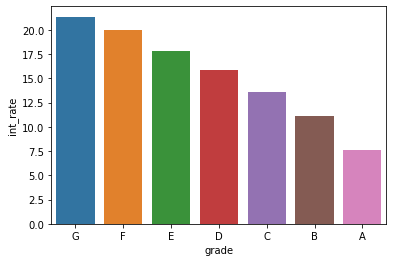

In [36]:
freq_rnkcnt_int=loans[(loans['loan_status']=="Charged Off")].groupby(['grade']).int_rate.mean()
freq_rnkcnt_int=pd.DataFrame(freq_rnkcnt_int)
freq_rnkcnt_int=pd.DataFrame(freq_rnkcnt_int.to_records())
freq_rnkcnt_int.sort_values(by="int_rate",inplace=True,ascending=False)
sns.barplot(x="grade",y="int_rate",data=freq_rnkcnt_int)

In [ ]:
# There seems to be a positive correlation between Grade and Interest Rate of Defaulters. Grade then seems to be a Classification of Risk. The higher the risk, the higher the interest levied seems to be a logical conclusion. 

In [ ]:
# The STORY UNTIL NOW AND HYPOTHESES / IMPLICATIONS

# 1. Over 60% of the defaulters seems to be from higher tenure of 60 months. THEREFORE: Ought the loan tenure be limited to 3 years / 36 months to increase chances of full repayment?
# 2. The higher the Grade of the borrower(s), the greater is the proportion of defaulters as well as the Interest Rate. THEREFORE: The definition of “Grade” would need to be looked into.  If Grade = Increased Risk Profile, the numbers make sense.
# 3. Those who do not Own, Mortgage or Rent their homes, and code “Others” are a larger proportion of defaulters. However, those coding “Others” are very few in number. THEREFORE: Those coding “Others” are very few and may be disregarded.
# 4. The proportion of defaulters seems to be highest among those who have been employed for 10 years or more. THEREFORE: It is worth investigating if the Club should be restricting itself to those under 10 years of work experience.
# 5. The lower the income bracket, the higher is the default rate. This is expected. THEREFORE: What could be done to discourage defaults?
# 6. Investing for Small Business = reason for the biggest proportion of defaulters by percentage of borrowers. Those borrowing for Major Purchases, Weddings, Credit Card Payments and Cars formed a lower proportion of defaulters compared to the other reasons. THEREFORE: This point would require further investigation.
# 7. But when it came to the total Number of Borrowers, those borrowing for Debt Consolidations, Credit Card Payments and Small businesses constituted a much larger cohort than others. THEREFORE: This point again, would need further investigation.
 
  
  
